In [ ]:
#Problem : Use Linear Regression for Predicting the profits of startups
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [ ]:
#Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [ ]:
#Analysing the data
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
# Numerical/Statistical analysis of the dataset
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# Dimensions of dataset
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [ ]:
# Here we are trying to check that whether this dataset has any duplicate value or not
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [ ]:
#Check for Null Values in the dataset
# Check for NULL values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#inference: There are no null values in the dataset

In [ ]:
# Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# from corr function we can find the correlation between the columns.
c = dataset.corr()
c

<ipython-input-13-2e0a3c171a0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


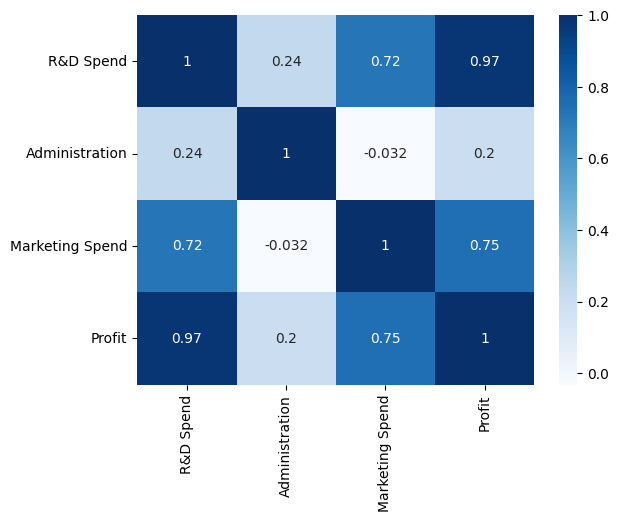

In [ ]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [ ]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
# Now we have to split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 'Florida'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [1000.23, 124153.04, 1903.93, 'New York'],
       [542.05, 51743.15, 0.0, 'New York'],
       [65605.48, 153032.06, 107138.38, 'New York'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [61994.48, 115641.28, 91131.24, 'Florida'],
       [63408.86, 129219.61, 46085.25, 'California'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [23640.93, 96189.63, 148001.11, 'California'],
       [76253.86, 113867.3, 298664.47, 'California'],
       [15505.73, 127382.3, 35534.17, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [64664.71, 139553.16, 137962.62, 'California'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [28754.33, 118546.05, 172795.67, 'California'],
       [0.0, 116983.8, 45173.06, 'California'],
  

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [ ]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149947
Model Score/Performance on Training data 0.9515496105627431


In [ ]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


In [ ]:
Inference :

#As we can see that the predicted value is somewhat near to the actual values, therefore, we can use this model for prediction. But first we need to calculate how much is the error generated.

In [ ]:
#R2 Score
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716635


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946446


In [ ]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974607


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580028
